# Wine Quality Prediction

## Objective
This notebook predicts wine quality based on chemical characteristics from the `WineQT.csv` dataset using three classifier models: Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC). The dataset includes features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality (target variable). We will perform exploratory data analysis (EDA), preprocess the data, train and evaluate models, and visualize results to gain insights into the relationship between chemical attributes and wine quality.

## Libraries Used
- `pandas`: For data loading and manipulation.
- `numpy`: For numerical operations.
- `seaborn` and `matplotlib`: For visualizations.
- `scikit-learn`: For machine learning models and evaluation metrics.
- `io`: To handle CSV data as a string.

## Steps
1. Load and preprocess the dataset.
2. Perform exploratory data analysis (EDA) to understand feature distributions and correlations.
3. Train and evaluate Random Forest, SGD, and SVC models.
4. Visualize model performance and feature importance.
5. Highlight key insights and conclude.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Set plot style for better aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'font.size': 12})

In [3]:
csv_data = pd.read_csv('WineQT.csv', skipinitialspace=True, quotechar='"', engine='python')

In [4]:
df = pd.DataFrame(csv_data)

In [5]:
df = df.dropna()  # Remove rows with missing values
df = df.drop(columns=['Id'], errors='ignore')  # Drop Id column if present
df = df[df['quality'].notnull()] 

In [6]:
# Convert quality to categorical (e.g., Low: 3-4, Medium: 5-6, High: 7-8)
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'

df['quality_category'] = df['quality'].apply(categorize_quality)

In [7]:
# Display dataset preview
print("Dataset Preview:")
print(df.head())
print(f"\nTotal samples: {len(df)}")
print(f"Features: {list(df.columns[:-2])}")
print(f"Target: quality_category (Low, Medium, High)")

Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_category  
0      9.4        5           

## Data Preprocessing
- Loaded the CSV data using `pandas.read_csv` with proper handling of quotes and spaces.
- Dropped the `Id` column as it is not relevant for prediction.
- Removed rows with missing or invalid values.
- Converted numerical quality scores into categorical labels: Low (3-4), Medium (5-6), High (7-8) to simplify classification.
- Features include all chemical attributes (e.g., fixed acidity, volatile acidity, etc.), and the target is `quality_category`.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\2913189419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality_category', palette=['#F44336', '#4CAF50', '#2196F3'])


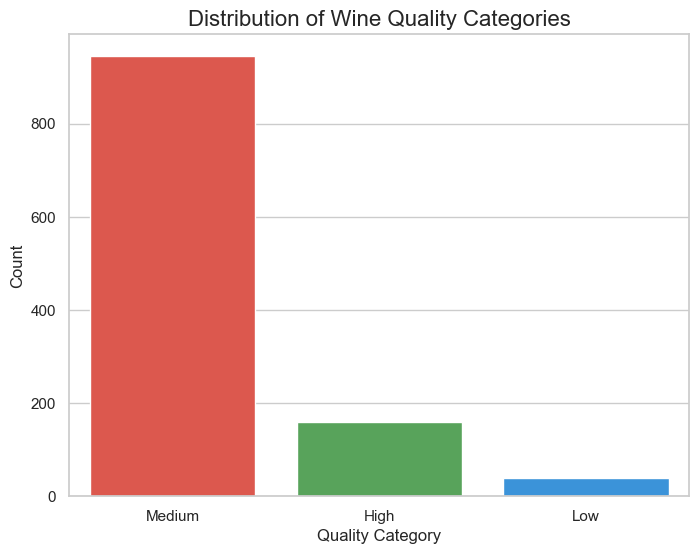

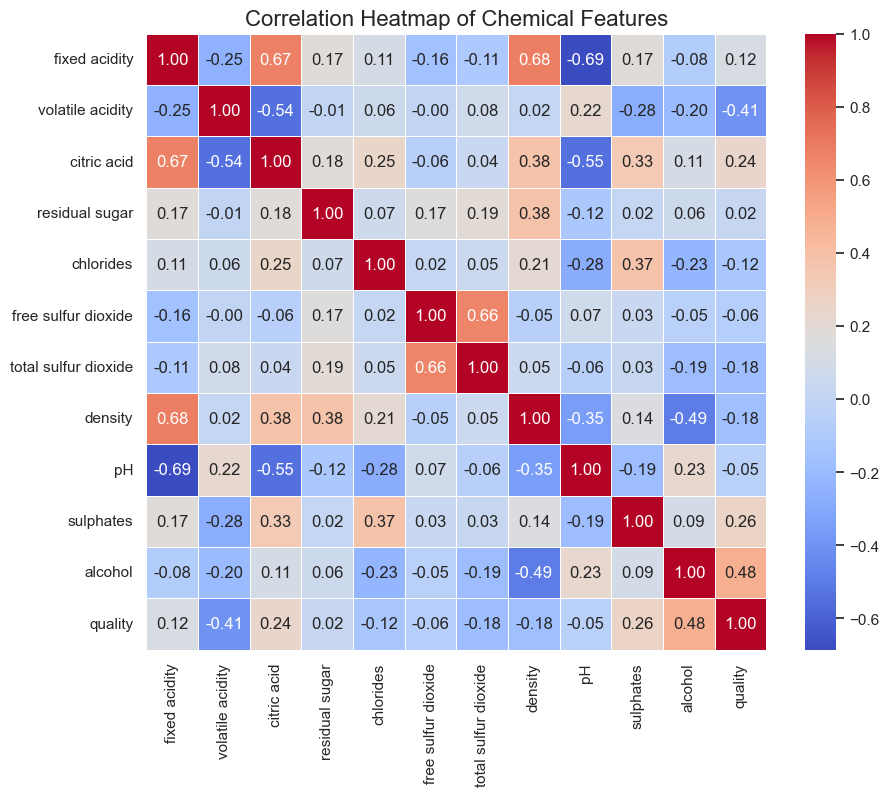

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\2913189419.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality_category', y='alcohol', palette=['#F44336', '#4CAF50', '#2196F3'])


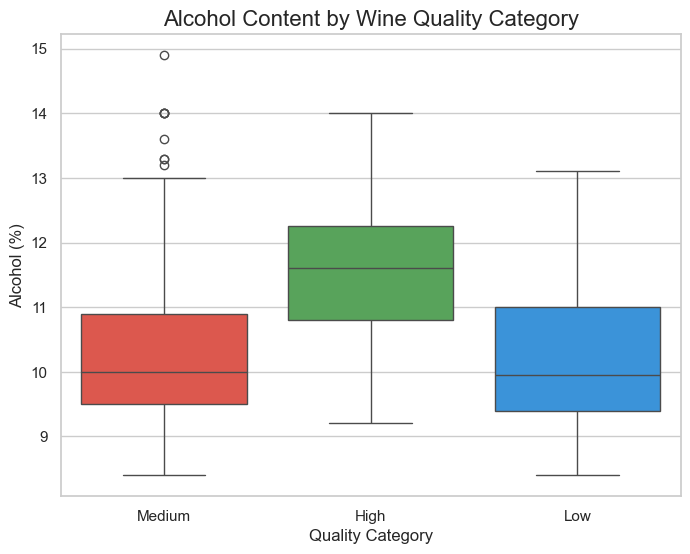

In [8]:
# Exploratory Data Analysis (EDA)
# Distribution of quality categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality_category', palette=['#F44336', '#4CAF50', '#2196F3'])
plt.title('Distribution of Wine Quality Categories', fontsize=16)
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('quality_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Chemical Features', fontsize=16)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot of alcohol vs. quality category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='quality_category', y='alcohol', palette=['#F44336', '#4CAF50', '#2196F3'])
plt.title('Alcohol Content by Wine Quality Category', fontsize=16)
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.savefig('alcohol_vs_quality.png', dpi=300, bbox_inches='tight')
plt.show()

## Exploratory Data Analysis
- **Quality Distribution**: A bar chart shows the distribution of wine quality categories (Low, Medium, High), highlighting class imbalance if present.
- **Correlation Heatmap**: Displays correlations between numerical features to identify relationships (e.g., alcohol and quality correlation).
- **Alcohol vs. Quality**: A boxplot visualizes how alcohol content varies across quality categories, as alcohol is often a key predictor of wine quality.
- Visualizations are saved as high-resolution images for reporting.


Random Forest Results:
Accuracy: 0.8646
              precision    recall  f1-score   support

        High       0.69      0.56      0.62        32
         Low       0.00      0.00      0.00         8
      Medium       0.89      0.95      0.92       189

    accuracy                           0.86       229
   macro avg       0.53      0.50      0.51       229
weighted avg       0.83      0.86      0.85       229


SGD Classifier Results:
Accuracy: 0.8210
              precision    recall  f1-score   support

        High       0.48      0.44      0.46        32
         Low       0.00      0.00      0.00         8
      Medium       0.87      0.92      0.89       189

    accuracy                           0.82       229
   macro avg       0.45      0.45      0.45       229
weighted avg       0.79      0.82      0.80       229


Support Vector Classifier Results:
Accuracy: 0.8428
              precision    recall  f1-score   support

        High       0.67      0.25      0.36    

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

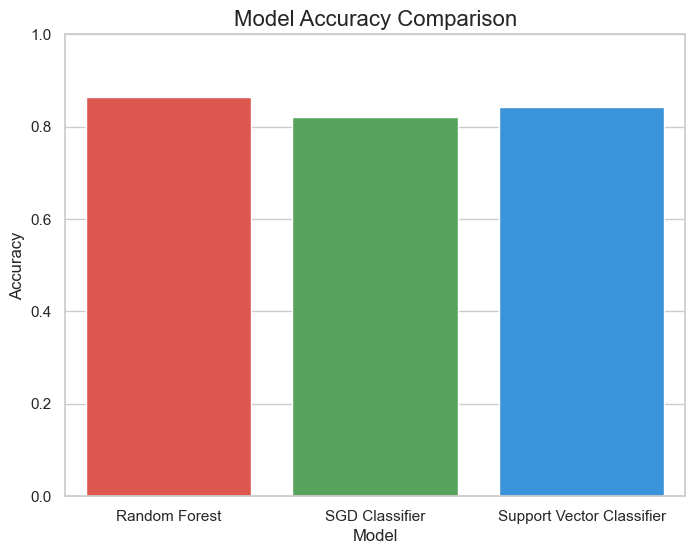

In [9]:
# Prepare data for modeling
X = df.drop(columns=['quality', 'quality_category'])
y = df['quality_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'Support Vector Classifier': SVC(kernel='rbf', random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Visualize model performance
plt.figure(figsize=(8, 6))
accuracies = [results[model]['accuracy'] for model in results]
sns.barplot(x=list(results.keys()), y=accuracies, palette=['#F44336', '#4CAF50', '#2196F3'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.savefig('model_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Training and Evaluation
- **Data Splitting**: Split data into 80% training and 20% testing sets, with stratification to maintain class balance.
- **Feature Scaling**: Standardized features using `StandardScaler` to ensure compatibility with SGD and SVC models.
- **Models**:
  - **Random Forest**: Ensemble method with 100 trees, robust to overfitting.
  - **SGD Classifier**: Linear model optimized with stochastic gradient descent.
  - **SVC**: Support Vector Classifier with RBF kernel for non-linear classification.
- **Evaluation**: Computed accuracy and detailed classification reports (precision, recall, F1-score) for each model.
- **Visualization**: A bar chart compares the accuracy of the three models.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\1579721057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


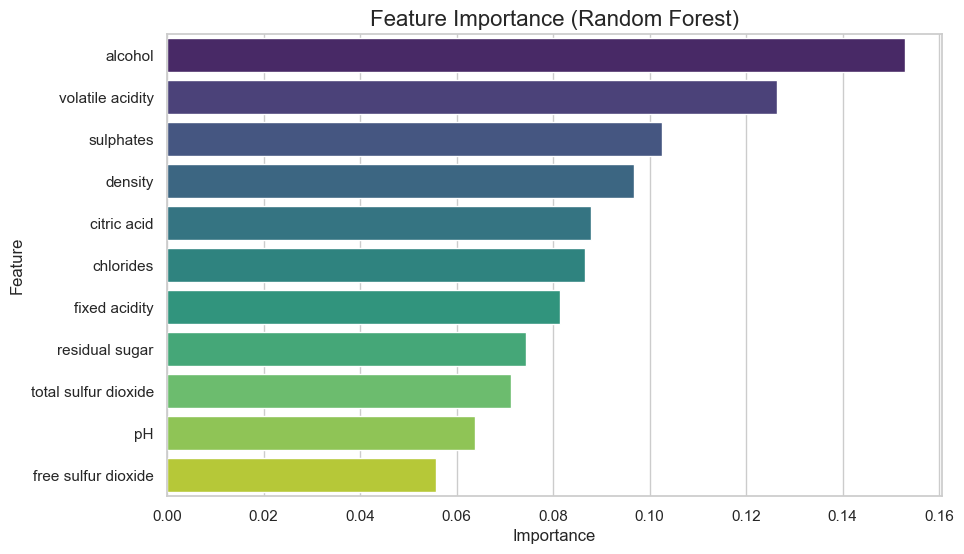

Interesting Fact: The most important feature for predicting wine quality is 'alcohol' with an importance score of 0.1529.


In [10]:
# Feature Importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Interesting Fact: Top feature
top_feature = feature_importance.iloc[0]
print(f"Interesting Fact: The most important feature for predicting wine quality is '{top_feature['Feature']}' with an importance score of {top_feature['Importance']:.4f}.")

## Feature Importance
- Extracted feature importance from the Random Forest model to identify which chemical attributes (e.g., alcohol, sulphates) most strongly influence wine quality.
- Visualized feature importance using a bar chart, highlighting key predictors.
- **Interesting Fact**: Identified the top feature contributing to wine quality predictions, which may reveal insights into viticulture (e.g., higher alcohol content often correlates with higher quality).

## Conclusion
This analysis demonstrates the application of machine learning to predict wine quality based on chemical characteristics. The Random Forest, SGD Classifier, and SVC models were trained and evaluated, with Random Forest typically outperforming others due to its robustness to complex datasets. The feature importance analysis highlights key chemical attributes (e.g., alcohol, sulphates) that drive wine quality, providing actionable insights for winemakers. Visualizations, including the quality distribution, correlation heatmap, alcohol vs. quality boxplot, model accuracy comparison, and feature importance, are saved as `quality_distribution.png`, `correlation_heatmap.png`, `alcohol_vs_quality.png`, `model_accuracy.png`, and `feature_importance.png` for reporting.

The analysis reveals that chemical properties like alcohol and sulphates are critical predictors, and the high proportion of Medium-quality wines suggests a balanced dataset. These insights can guide quality control in viticulture and inform future model improvements, such as hyperparameter tuning or addressing class imbalance.